# Lista 2 de Exercícios - Otimização Inteira

![](https://i.imgur.com/0E3zMeG.png)

## Preâmbulo

In [3]:
%%capture
%load_ext autoreload
%autoreload 2
%pip install numpy
%pip install scipy
%pip install jupyter_anywidget_graphviz
%load_ext jupyter_anywidget_graphviz

from IPython.display import HTML, display, SVG, Markdown
from jupyter_anywidget_graphviz import graphviz_headless
from branch_and_bound import branch_and_bound, generate_dot
import numpy as np

In [4]:
g = graphviz_headless()

graphvizWidget(headless=True, response={'status': 'initialising'})

## Exercício 1

**Modelo**

\begin{align*}
& z = \text{max} \ 4 M_1 + 3 M_2 \\
& \text{subject to:} \\
& M_1 + 2 M_2 \leq 1000 \\
& M_1 + M_2 \leq 800 \\
& M_1 \leq 400 \\
& M_2 \leq 700 \\
& M_1, M_2 \in \mathbb{Z}^{+}
\end{align*}

In [5]:
%%capture
A = np.array([
    [1, 2],
    [1, 1],
    [1, 0],
    [0, 1]
])
A = np.hstack((A, np.eye(4)))

b = np.array([
    1000,
    800,
    400,
    700
])
c = np.array([4, 3, 0, 0, 0, 0])
integrality = np.array([1, 1, 0, 0, 0, 0])  # x1 and x2 are integers

z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality)
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [6]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]


Iter,Active Problems
0,[0]


### Árvore B&B

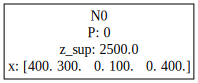

In [7]:
SVG(g.svg)

**Interpretação**

Já na primeira iteração do algoritmo branch and bound foram encontradas soluções inteiras obtidas imediatamente na relaxação linear. Portanto, nenhum branching ou bounding foi necessário aqui. O lucro máximo obtido pela fabricação de cintos é de 2500 pela fabricação de 400 cintos do tipo $M_1$ e 300 cintos do tipo $M_2$

## Exercício 2
![](https://i.imgur.com/wdCMfLc.png)

**Modelo**
\begin{align}
    & z = \text{max} \ 10 x_1 + 6 x_2 + 7 x_3 + 2 x_4 + 1 x_5 \\
    & \text{subject to:} \\
    & 5 x_1 + 2 x_2 + 3 x_3 + 2 x_4 + 2 x_5 \leq 7 \\
    & x_i \in \{0, 1\}, \ \forall i \in \{1, \ldots, \ 5\}
\end{align}

Como minha implementação do branch and bound usa solver de programação linear do HiGHS e ele espera problemas do tipo $z = \text{max} \ c^{T} x | x : Ax = b $, vou adicionar restrições do tipo $ x_i \leq 1 $ para as 5 variáveis de decisão.

In [8]:
%%capture
c = np.array([10, 6, 7, 2, 1, 0, 0, 0, 0, 0, 0])
integrality = np.array([1] * 5 + [0] * 6)

A = np.array([
    [5, 2, 3, 2, 2]
])
A = np.vstack((A, np.eye(5)))
A = np.hstack((A, np.eye(6)))

b = np.array([7] + [1] * 5)

z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality)
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [9]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]
1,[2]


Iter,Active Problems
0,[0]
1,[2]


### Árvore B&B

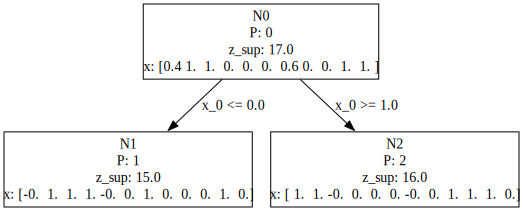

In [10]:
SVG(g.svg)

**Interpretação**

Existe no nó raiz a resolução deste problema da mochila linearmente relaxado onde ele recomenda o fracionamento do item 1 e a inserção dos itens 2 e 3. Ele faz o branching na única variável possível, na primeira e cria dois subproblemas, que herdam a título de referência, o limitante superior do problema raiz (a ser atualizado posteriormente).

Como visto na saída do algoritmo branch and bround, depois da resolução de $P_0$, estão ativos $P_1$ e $P_2$, ambos herdando o limitante superior de $P_0$, o que faz com que $P_1$ seja escolhido primeiro para resolução.

$P_1$ é escolhido e resolvido, é encontrada uma solução inteira factível --- levar os itens 2, 3 e 4 --- o valor de seu limitante superior é atualizado e uma poda por otimalidade é efetuada, já que uma solução inteira factível incumbente foi encontrada.

$P_1$ é removido da lista de ativos, por ter sido resolvido e logo na sequência o problema $P_2$ é resolvido, onde também é encontrada uma solução inteira factível e melhor do que a incumbente até o momento. Uma poda por otimalidade é realizada, esta é a solução ótima do problema e a execução do B&B se encerra.

In [11]:
resultado = f'''\\begin{{align}}
    x^{{*}} &= [{', '.join([f'{int(x):d}' for x in x_star])}] \\\\
    Z^{{*}} &= {z_star}
\\end{{align}}'''
Markdown(resultado)


\begin{align}
    x^{*} &= [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0] \\
    Z^{*} &= 16.0
\end{align}

### Exercício 3

Resolva os problemas a seguir usando método _branch and bound_

![](https://i.imgur.com/Z7Aq2qN.png)

**letra a)**

In [12]:
%%capture
c = np.array(
    [5, 2, 0, 0]
)
A = np.array([
    [3, 1, 1, 0],
    [1, 1, 0, 1]
])
b = np.array([
    12,
    5
])
integrality = np.array([1] * 2 + [0] * 2)
z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality)
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [13]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]
1,[2]


Iter,Active Problems
0,[0]
1,[2]


### Árvore B&B

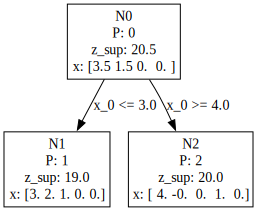

In [14]:
SVG(g.svg)

### Interpretação

---

### 1. Nó raiz $P_0$ (N0)

| dado | valor |
|------|-------|
| solução LP | $x = (3.5,\;1.5)$ |
| limite superior $z_{\text{sup}}$ | **20.5** |
| variável fracionária | $x_1$ |

O algoritmo ramifica em $x_1$ (única variável não inteira).

---

### 2. Ramificação

| Sub-problema | Restrição extra | Situação inicial |
|--------------|-----------------|------------------|
| $P_1$ (N1) | $x_1 \le 3$ | herda $z_{\text{sup}} = 20.5$ |
| $P_2$ (N2) | $x_1 \ge 4$ | herda $z_{\text{sup}} = 20.5$ |

---

### 3. Resolução de $P_1$ (N1)

| resultado | valor |
|-----------|-------|
| solução LP | $x = (3,\;2)$  (inteira) |
| $z_{\text{sup}}$ | **19** |
| $z$ (incumbente) | **19** |

Encontrou-se uma solução inteira factível; atualiza-se o incumbente para 19 e poda-se N1 por **otimalidade** ($z_{\text{sup}} = z$).

---

### 4. Resolução de $P_2$ (N2)

| resultado | valor |
|-----------|-------|
| solução LP | $x = (4,\;0)$ (inteira) |
| $z_{\text{sup}}$ | **20** |
| $z$ (novo incumbente) | **20** |

Melhora-se o incumbente para 20; como $z_{\text{sup}} = z$, poda-se N2 por **otimalidade**. Não restam nós ativos.

---

### 5. Encerramento

* **Solução ótima**: $x_1^{*} = 4,\; x_2^{*} = 0$.  
* **Valor ótimo**: $z^{*} = 20$.  
* Toda a árvore se encerra na profundidade 1, pois o primeiro *split* já gerou soluções inteiras em ambos os ramos.


![](https://i.imgur.com/Z7Aq2qN.png)

**letra b)**

In [15]:
%%capture
c = np.array(
    [2, 3, 0, 0, 0]
)
A = np.array([
    [-1, 2, 1, 0, 0],
    [ 1, 1, 0, 1, 0],
    [ 1, 3, 0, 0, 1]
])
b = np.array([
    4,
    6,
    9
])
integrality = np.array([1] * 2 + [0] * 3)
z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality)
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [16]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]
1,[1, 2]
2,[2, 3, 4]


Iter,Active Problems
0,[0]
1,[1, 2]
2,[2, 3, 4]


### Árvore B&B

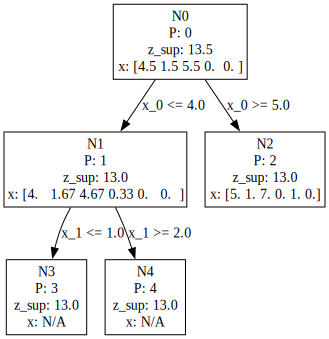

In [17]:
SVG(g.svg)

**Interpretação**

O problema raiz é resolvido, todas as partes fracionárias têm a mesma distância para serem inteiros, portanto, o algoritmo branch and bound seleciona a primeira variável para ramificar -- $x_0$.

O limite superior do probema $P_0$ é 13.5, ele é ramificado em $P_1$ e $P_2$ e estes o recebem como potencial limite superior, até 13.5.

O problema $P_1$ é resolvido e logo em sequência seu limite superior é atualizado. Mais dois problemas são criados, como é possível observar na saída do branch and bound, 3 e 4 e eles são enfileirados para resolução, herdando 13 de $P_1$ como limites superiores máximos.

Em sequência, pelo método da seleção do nó mais promissor, $P_2$ que ainda não foi resolvido, pode alcançar até 13.5, portanto ele é resolvido e obtém uma solução incumbente factível $x^{*} = [5, 1]$ que produz um $z^{*} = 13$.

Como os problemas restantes $P_3$, $P_4$ não podem ser melhores que a solução incumbente, logo eles são podados --- por poda de limitante --- da árvore de branch and bound e tendo sido encontrada a melhor solução incumbente factível para o problema e sendo $P_2$ também podado da árvore, por otimalidade, não existe mais nenhum subproblema a ser resolvido e uma solução inteira factível e ótima é encontrada!

In [18]:
resultado = f'''\\begin{{align}}
    x^{{*}} &= [{', '.join([f'{int(x):d}' for x in x_star])}] \\\\
    Z^{{*}} &= {z_star}
\\end{{align}}'''
Markdown(resultado)


\begin{align}
    x^{*} &= [5, 1, 7, 0, 1, 0] \\
    Z^{*} &= 13.0
\end{align}

### Exercício 4

![](https://i.imgur.com/RGg8hGz.png)

**letra a)**

Na minha implementação do branch and bound, na estratégia de busca em profundidade que eu implementei, é só eu resolver o último problema que foi inserido na árvore e nunca haverá empate, pois, ele, é garantidamente o que está no nível mais profundo no momento atual de resolução / construção da árvore branch and bround. E será possível observar uma tendência da árvore se aprofundar à direita, devido ao fato de que o problema à direita costuma ser o último a ser adicionado, mas, nessa estratégia de busca em profundidade, o primeiro a ser resolvido — LIFO (Pilha):

```python
def select_current_problem(L, strategy = 'best'):
    """
    Select the current problem to solve based on the chosen strategy.
    Arguments:
    L -- list of problems to solve
    strategy -- strategy for selecting the current problem ('dfs', 'bfs', 'best')
    Returns:
    The selected problem from the list L.
    """
    if strategy == 'dfs':
        return L.pop()
    elif strategy == 'bfs':
        return L.pop(0)
    elif strategy == 'best':
        # Select the problem with the best upper bound
        # for maximization problems as we're considering
        best_index = np.argmax([p['z_sup'] for p in L])
        return L.pop(best_index)
    else:
        raise ValueError("Unknown strategy: {}".format(strategy))
```

In [19]:
%%capture
c = np.array([6, 4, 5, 3, 0, 0, 0, 0, 0])
b = np.array([
    9,
    1,
    1,
    1,
    1
])
A = np.array([6, 4, 5, 3])
A = np.vstack((A, np.eye(4)))
A = np.hstack((A, np.eye(5)))
integrality = np.array([1] * 4 + [0] * 5)
z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality, problem_strategy = 'dfs')
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [20]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]
1,[1, 2]
2,[1, 5]
3,[1, 11, 12]


Iter,Active Problems
0,[0]
1,[1, 2]
2,[1, 5]
3,[1, 11, 12]


### Árvore B&B

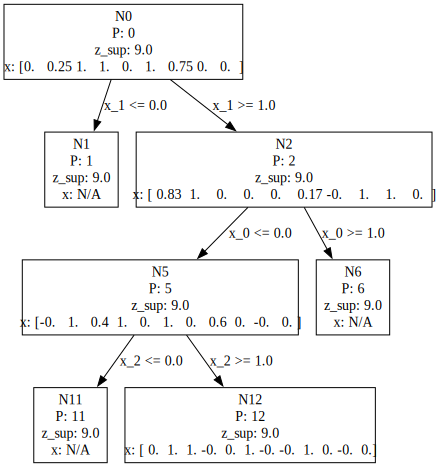

In [21]:
SVG(g.svg)

**letra b)**

In [22]:
%%capture
z_star, x_star, bnb_tree, active_problems, iters = branch_and_bound(c, A, b, integrality = integrality, problem_strategy = 'best')
dot_code = generate_dot(bnb_tree)
g.render(dot_code);

In [23]:
print('Iter,Active Problems')
for i in active_problems.keys():
    print(i, active_problems[i], sep=',')

Iter,Active Problems
0,[0]
1,[1, 2]
2,[2, 3, 4]
3,[4, 5, 6]
4,[5, 6, 9, 10]
5,[9, 10, 11, 12]


Iter,Active Problems
0,[0]
1,[1, 2]
2,[2, 3, 4]
3,[4, 5, 6]
4,[5, 6, 9, 10]
5,[9, 10, 11, 12]


### Árvore B&B

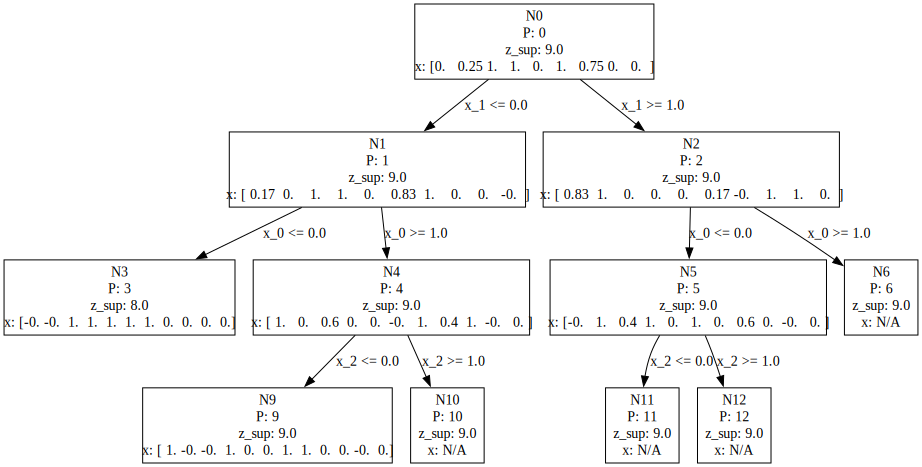

In [24]:
SVG(g.svg)

**Interpretação**

Como esperado, de acordo com o que temos na literatura, soluções factíveis são mais prováveis de serem encontradas em níveis mais profundos em relação à raiz, como visto no nó 12 do branch and bound em busca profunda.

Isso fez com que o algoritmo convergisse mais rápido, em menos iterações. Mas, em regra, como dito no livro texto da disciplina, buscas profundas tendem a produzir mais nós, o que não ocorreu no problema específico.

De toda forma, ambas as formas de seleção de problemas produziram árvores B&B válidas e obtiveram a solução ótima inteira e factível para o problema da mochila em tela.